# Проверка гипотезы для увеличения выручки с помощью A/B-теста

Мы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. В ходе анализа A/B-теста мы будем изучать такие метрики, как стоимость заказов и их количество.

В первую очередь проверим 9 гипотез, и приоритизируем их. Затем запустим A/B-тест, после чего начнем анализ результатов. Для этого мы будем строить графики различных показателей, и на их основании нам будет необходимо принять решение: продолжить тест, остановить тест и зафиксировать победу одной из групп, или остановить тест и зафиксировать отсутствие различий между группами.

## Часть 1. Приоритизация гипотез

В первую очередь, перед началом исследования, загрузим необходимые библиотеки и проведем предобработку данных.

### Шаг 1. Предобработка данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from datetime import datetime, timedelta
import datetime as dt
pd.options.display.max_colwidth = 120

Теперь откроем файл с гипотезами, и выведем содержимое на экран для проверки на наличие/отстуствие пропусков и дубликатов.

In [ ]:
data_hypothesis = pd.read_csv('/datasets/hypothesis.csv')
data_hypothesis.info()
data_hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Мы видим, что в таблице нет пропусков и дубликатов, однако, названия столбцов заданы некорректно, исправим их.

In [ ]:
data_hypothesis.columns = data_hypothesis.columns.str.lower()
data_hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Теперь мы можем приступить к приоритизации. Для этого, применим 2 фреймворка - ICE и RICE. Начнем с ICE.

### Шаг 2. Применение фреймворка ICE для приоритизации гипотез

In [ ]:
data_hypothesis['ICE'] = (data_hypothesis['impact'] * data_hypothesis['confidence']) / data_hypothesis['efforts']
data_hypothesis[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False).round(2)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Таким образом, после применения фреймворка ICE, мы получили 3 наиболее перспективные гипотезы:

- гипотеза под номером 8 - запустить акцию, дающую скидку на товар в день рождения
- гипотеза под номером 0 - добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- гипотеза под номером 7 - добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

Посмотрим, как изменится приоритет после применения другого фреймворка - RICE.

### Шаг 3. Применение фреймворка RICE для приоритизации гипотез

In [ ]:
data_hypothesis['RICE'] = ((data_hypothesis['reach'] * data_hypothesis['impact']
                           * data_hypothesis['confidence']) / data_hypothesis['efforts'])
data_hypothesis[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


После применения фреймворка RICE приоритет немного изменился - в топ-3 вошли следующие гипотезы:

- гипотеза под номером 7 - добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- гипотеза под номером 2 - добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- гипотеза под номером 0 - добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Вместо 8 гипотезы в лидерах теперь оказалась гипотеза 2. Это произошло из-за того, что параметр *Reach*, использующийся для расчета приоритизации во фреймворке RICE, у 2 гипотезы намного выше, чем у 8. Однако, отметим, что гипотезы под номерами 0 и 7 оказались в числе лидеров в обоих фреймворках. Таким образом, можем предположить, что эти гипотезы являются наиболее перспективными.

Теперь можем приступать к анализу A/B-теста.

## Часть 2. Анализ A/B-теста

Для проведения анализа откроем необходимые датафреймы, выведем их содержимое на экран и проведем предобработку данных, если это потребуется.

### Шаг 1. Предобработка данных

In [ ]:
data_orders = pd.read_csv('/datasets/orders.csv')
data_orders.info()
data_orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


Мы видим, что пропусков нет, проверим на наличие дубликатов.

In [ ]:
data_orders.duplicated().sum()

0

Дубликатов не обнаружено, однако, необходимо переименовать некорректные названия некоторых столбцов.

In [ ]:
data_orders = data_orders.rename(columns = {
    'transactionId' : 'transaction_id',
    'visitorId' : 'visitor_id'
})

Также, столбец с датой необходимо привести к верному типу данных.

In [ ]:
data_orders['date'] = pd.to_datetime(data_orders['date'])
data_orders.info()
data_orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


Теперь все хорошо. Можно приступать к загрузке следующего датафрейма.

In [ ]:
data_visitors = pd.read_csv('/datasets/visitors.csv')
data_visitors.info()
data_visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Пропусков снова нет, названия столбцов корректные, проверим дубликаты.

In [ ]:
data_visitors.duplicated().sum()

0

Дубликатов не обнаружено, приведем столбец с датой к верному типу данных.

In [ ]:
data_visitors['date'] = pd.to_datetime(data_visitors['date'])
data_visitors.info()
data_visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Предобработка проведена, приступим непосредственно к анализу A/B-теста.

### Шаг 2. Построение графика кумулятивной выручки по группам

In [ ]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = data_orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: data_orders[
        np.logical_and(data_orders['date'] <= x['date'], data_orders['group'] == x['group'])
    ].agg(
        {'date' : 'max',
         'group' : 'max',
         'transaction_id' : 'nunique',
         'visitor_id' : 'nunique',
         'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(
    lambda x: data_visitors[
        np.logical_and(data_visitors['date'] <= x['date'], data_visitors['group'] == x['group'])
    ].agg(
        {'date' : 'max',
         'group' : 'max',
         'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


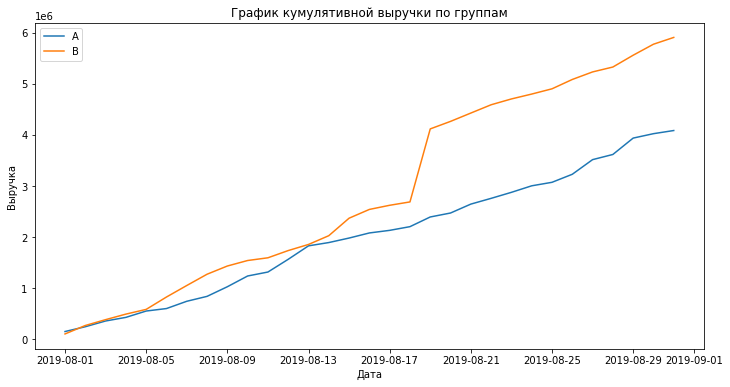

In [ ]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12, 6))

# строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
plt.show()

Графики обоих групп постоянно возрастают, что свидетельствует об увеличении выручки. График группы B до определенного момента совсем немного опережает график группы A. Однако, после примерно 18 августа можно увидеть резкий скачок вверх у графика группы B, что означает резкое увеличение стоимости или количества заказов. А это, в свою очередь, может говорить нам об аномалиях.

### Шаг 3. Построение графика кумулятивного среднего чека по группам

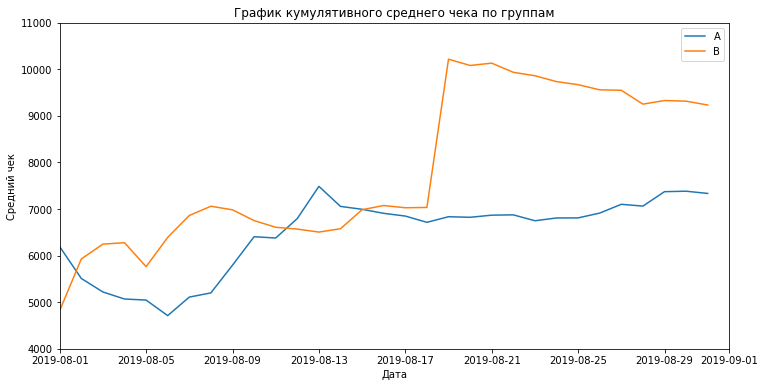

In [ ]:
# построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:
plt.figure(figsize=(12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 4000, 11000])

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.show()

График группы B практически всегда растет, однако после резкого скачка вверх примерно 18 августа идет на спад. График группы A более стабильный, хотя его значения и ниже - после спада вначале он растет более плавно до окончания наблюдения.

### Шаг 4. Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

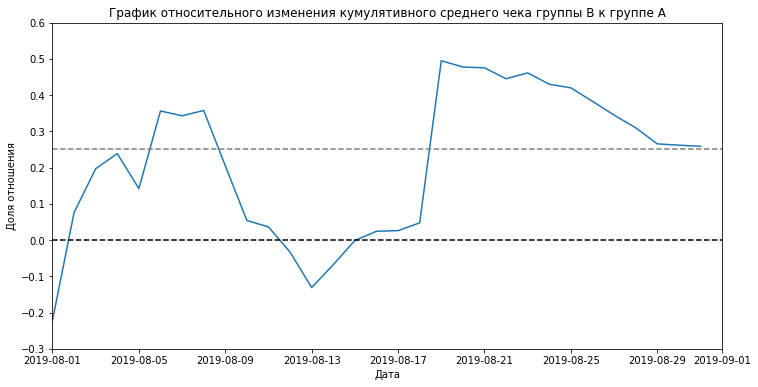

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 6))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем оси X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.25, color='grey', linestyle='--')

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.3, 0.6])

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Доля отношения')
plt.show()

В самом начале можно наблюдать возрастание доли отношения, после чего идет снижение. Однако, 18-19 августа график резко возрастает, что наводит нас на мысль о наличии аномально крупных заказов. Затем снова идет снижение графика.

### Шаг 5. Построение графика кумулятивного среднего количества заказов на посетителя по группам

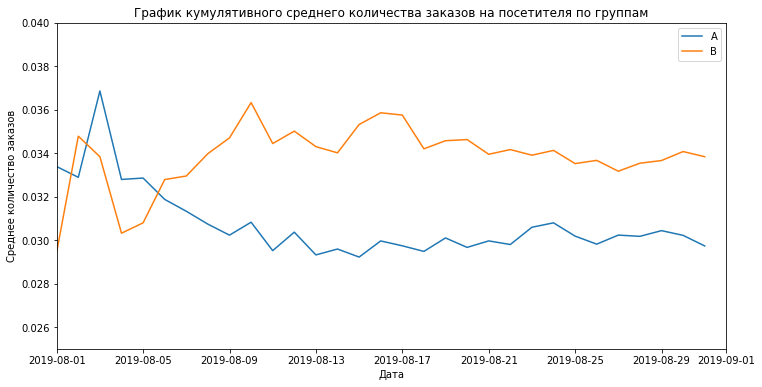

In [ ]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12, 6))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.025, 0.04])

plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.legend()
plt.show()

На графике мы видим практически зеркальную ситуацию - график группы A в самом начале возрастал, как и график группы B, и был лидером. Однако, примерно 6 августа расположения графиков кардинально изменились - график группы B начал возрастать и опередил график группы A, после чего стабилизировался. График же группы A, напротив, снизился, и оказался ниже графика группы B по значениям, но также стабилизировался.

### Шаг 6. Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

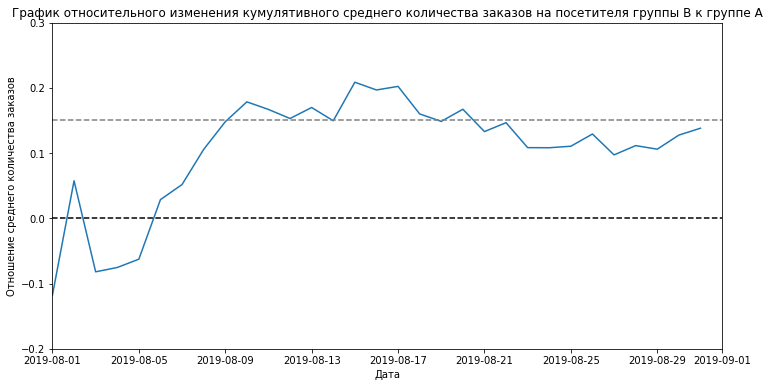

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 6))

# cтроим отношение среднего количества заказов
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/
         mergedCumulativeConversions['conversionA']-1)

# добавляем оси X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.2, 0.3])

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение среднего количества заказов')
plt.show()

На этом графике также видно, что сначала график группы B был ниже, чем график группы A. Но после 6 августа значения графика группы B пошли вверх, после чего стабилизировались. Прирост значений у группы B примерно в 15% от группы A.

### Шаг 7. Построение точечного графика количества заказов по пользователям

In [ ]:
# подсчитаем количество заказов по пользователям
ordersByUsers = (
    data_orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'transaction_id']
print(ordersByUsers.sort_values(by = 'transaction_id', ascending = False).head(10))

      visitor_id  transaction_id
1023  4256040402              11
591   2458001652              11
569   2378935119               9
487   2038680547               8
44     199603092               5
744   3062433592               5
55     237748145               5
917   3803269165               5
299   1230306981               5
897   3717692402               5


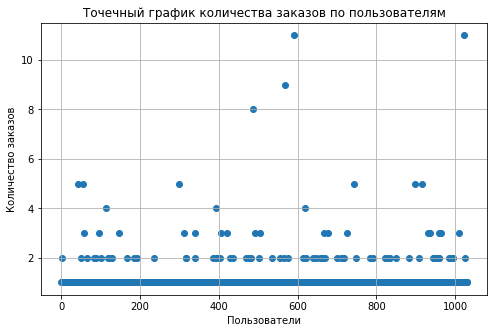

In [ ]:
# построим точечную диаграмму количества заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(8, 5))

plt.scatter(x_values, ordersByUsers['transaction_id'])

plt.grid()
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show()

Мы видим, что основная масса пользователей сделала 1-2 заказа. Больше 3-ех заказов сделало совсем небольшое число пользователей, что можно считать аномалией.

### Шаг 8. Подсчет 95-й и 99-й перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей

In [ ]:
print(np.percentile(ordersByUsers['transaction_id'], [95, 99]))

[2. 4.]


Не более 5% пользователей сделали больше 2-ух заказов, и не более 1% пользователей сделали больше 4-ех заказов. Предположим, что аномальными можно считать пользователей, сделавших 4 заказа и более, то есть 1%. В дальнейшем проверим это предположение.

### Шаг 9. Построение точечного графика стоимостей заказов

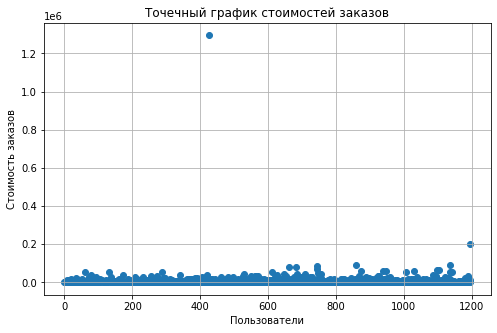

In [ ]:
# построим точечную диаграмму стоимостей заказов
x_values = pd.Series(range(0,len(data_orders['revenue'])))

plt.figure(figsize=(8, 5))

plt.scatter(x_values, data_orders['revenue'])

plt.grid()
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.show()

График получился слишком скомканным из-за наличия одного аномального значения. Зададим для графика ограничение, чтобы результат был более наглядным.

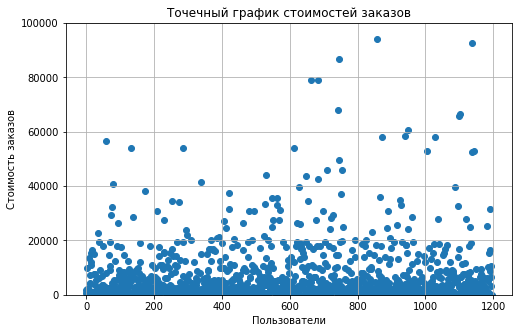

In [ ]:
# построим точечную диаграмму стоимостей заказов с ограничением масштаба по оси Y
x_values = pd.Series(range(0,len(data_orders['revenue'])))

plt.figure(figsize=(8, 5))

plt.scatter(x_values, data_orders['revenue'])

plt.grid()
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')

# задаем границы графика по оси Y
plt.ylim([0, 100000])

plt.show()

Таким образом, мы выяснили, что основная часть стоимостей заказов находится в пределах 40000. Выше этого значения находится совсем небольшая часть, поэтому, можем предположить, что это аномальные значения.

### Шаг 10. Подсчет 95-й и 99-й перцентилей стоимостей заказов. Выбор границы для определения аномальных заказов

In [ ]:
print(np.percentile(data_orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% заказов дороже 28000, и не более 1% заказов дороже 58000. Предположим, что аномальными можно считать заказы на сумму 40000 и более, то есть от 1% до 5%. В дальнейшем проверим это предположение.

### Шаг 11. Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным без удаления аномальных пользователей с применением теста Манна-Уитни. Сформулируем гипотезы:

- Нулевая H0: различий в среднем количестве заказов на посетителя между группами нет.
- Альтернативная H1: различия в среднем количестве заказов на посетителя между группами есть.

Создадим переменные *ordersByUsersA* и *ordersByUsersB* со столбцами **['userId', 'orders'],** где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов.

Объявим переменные *sampleA* и *sampleB,* в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули.

In [ ]:
visitorsADaily = data_visitors[data_visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = data_visitors[data_visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    data_orders[data_orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis=1,).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',]

ordersBDaily = (
    data_orders[data_orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}),axis=1,).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left'))
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [ ]:
ordersByUsersA = (
    data_orders[data_orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    data_orders[data_orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                               name='orders')], axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                               name='orders')], axis=0)

print('P-value:', "{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print('Значение отношения:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.017
Значение отношения: 0.138


Первое число в выводе - *P-value* - **меньше 5%,** нулевую гипотезу мы отвергаем. Это значит, что в «сырых» данных статистически значимые различия есть. Относительный прирост группы B равен **13.8%** - второе число в выводе.

### Шаг 12. Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным без удаления аномальных пользователей с применением теста Манна-Уитни. Для этого передадим данные о выручке с заказов. Сформулируем гипотезы:

- Нулевая H0: различий в среднем чеке заказа между группами нет.
- Альтернативная H1: различия в среднем чеке заказа между группами есть.

In [ ]:
print('P-value:', '{0:.3f}'.format(st.mannwhitneyu(data_orders[data_orders['group']=='A']['revenue'],
                                          data_orders[data_orders['group']=='B']['revenue'])[1]))
print('Значение отношения:', '{0:.3f}'.format(data_orders[data_orders['group']=='B']['revenue'].mean() /
                       data_orders[data_orders['group']=='A']['revenue'].mean() - 1))

P-value: 0.729
Значение отношения: 0.259


Первое число в выводе - *P-value* - **значительно больше 5%,** нулевую гипотезу не отвергаем. Это значит, что в «сырых» данных статистически значимых различий нет. Однако, относительный прирост группы B равен **25.9%** - второе число в выводе. Скорее всего, это свидетельствует о наличии аномалий. В следующем шаге избавимся от них, и посчитаем статистическую значимость по «очищенным» данным.

### Шаг 13. Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил 4 заказа и более, или совершил заказ на сумму 40 000 и более. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.

Удалять будем именно пользователей — сначала определим аномальные заказы. Затем пользователей, совершивших их, добавим в список аномальных.

Сделаем срезы пользователей с числом заказов 4 и более — *usersWithManyOrders,* и пользователей, совершивших заказы на сумму 40 000 и более — *usersWithExpensiveOrders.* Объединим их в таблице *abnormalUsers,* удалим дубликаты, отсортируем по возрастанию.

In [ ]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['userId']], axis=0)

usersWithExpensiveOrders = data_orders[data_orders['revenue'] > 40000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values())

print(abnormalUsers.head())
print(abnormalUsers.shape[0])

1099    148427295
684     358944393
648     382846391
1137    759473111
339     834731816
dtype: int64
29


Количество аномальных пользователей - **29.**

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Создадим переменные *sampleAFiltered* и *sampleBFiltered,* в которых сохраним очищенные данные о заказах — не включая аномальных пользователей.

Применим статистический критерий Манна-Уитни к полученным выборкам.

In [ ]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
            name='orders')], axis=0)

sampleBFiltered = pd.concat(
    [ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
            name='orders')], axis=0)

print('P-value:', '{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Значение отношения:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean() - 1))

P-value: 0.010
Значение отношения: 0.166


Вывод по «очищенным» данным остался таким же, как и по «сырым» - *P-value* **меньше 5%,** значит статистически значимые различия есть. Тем более, значение прироста группы B после удаления выбросов выросло - до **16.6%.**

### Шаг 14. Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

In [ ]:
print('P-value:', '{0:.3f}'.format(st.mannwhitneyu(
            data_orders[np.logical_and(data_orders['group'] == 'A',
                    np.logical_not(data_orders['visitor_id'].isin(abnormalUsers)))
            ]['revenue'], data_orders[np.logical_and(data_orders['group'] == 'B',
                    np.logical_not(data_orders['visitor_id'].isin(abnormalUsers)))
            ]['revenue'])[1]))

print('Значение отношения:', "{0:.3f}".format(data_orders[np.logical_and(
                data_orders['group'] == 'B',
                np.logical_not(data_orders['visitor_id'].isin(abnormalUsers)))
        ]['revenue'].mean() / data_orders[
            np.logical_and(data_orders['group'] == 'A',
                np.logical_not(data_orders['visitor_id'].isin(abnormalUsers)))
        ]['revenue'].mean() - 1))

P-value: 0.612
Значение отношения: 0.069


*P-value* хоть и сократился, но все еще остался **больше 5%.** А вот относительный прирост группы B сократился до **6.9%** - это произошло после того, как мы избавились от аномальных значений. Следовательно, после «очищения» данных выводы остаются прежними - статистически значимых различий в среднем чеке заказа между группами нет.

### Шаг 15. Принятие решения по результатам теста

По результатам теста можно сделать следующие выводы:

- Статистически значимые различия в среднем количестве заказов на посетителя между группами как по «сырым», так и по «очищенным» данным **есть.**
- Статистически значимых различий в среднем чеке заказа между группами как по «сырым», так и по «очищенным» данным **нет.**
- График кумулятивного среднего количества заказов на посетителя по группам показал нам, что результаты группы B лучше, чем результаты группы A.
- График кумулятивного среднего чека по группам дал нам понять, что в данных есть аномалии.

Исходя из сделанных выводов, принято решение **остановить тест и зафиксировать победу группы B над группой A.**